In [1]:
from pref_voting.profiles import Profile
from pref_voting.voting_methods import *
from pref_voting.weighted_majority_graphs import *
from pref_voting.spatial_profiles import *
from pref_voting.rankings import *
from pref_voting.pairwise_profiles import *

In [3]:
comparisons1 = [({"A", "B"}, {"A", "B"}), ({"A", "C"}, {"C"}), ({"B", "C"}, {"B"})]
comparisons2 = [({"A", "B"}, {"A", "B"}), ({"A", "C"}, {"A"}), ({"B", "C"}, {"B"})]

comparisons3 = [({"A", "B"}, {"A", "B"}),   ({"B", "C"}, {"B"})]

pprof = PairwiseProfile([comparisons1, comparisons2, comparisons3],rcounts=[3, 2, 1])

pprof.display()

for comp in pprof.pairwise_comparisons: 
    print(comp)
    print(comp.is_transitive(["A", "B", "C"]))    
    print(comp.is_coherent())

3: {A, B} -> {A, B}, {A, C} -> {C}, {B, C} -> {B}
2: {A, B} -> {A, B}, {A, C} -> {A}, {B, C} -> {B}
1: {A, B} -> {A, B}, {B, C} -> {B}
{A, B} -> {A, B}, {A, C} -> {C}, {B, C} -> {B}
False
True
{A, B} -> {A, B}, {A, C} -> {C}, {B, C} -> {B}
False
True
{A, B} -> {A, B}, {A, C} -> {C}, {B, C} -> {B}
False
True
{A, B} -> {A, B}, {A, C} -> {A}, {B, C} -> {B}
True
True
{A, B} -> {A, B}, {A, C} -> {A}, {B, C} -> {B}
True
True
{A, B} -> {A, B}, {B, C} -> {B}
False
False


In [3]:
r1 = Ranking({0:1})
r2 = Ranking({0:1, 1:2})
r3 = Ranking({0:1, 1:1})
r4 = Ranking({0:1, 1:1, 2:3, 3:4})
r5 = Ranking({2:3})
r6 = Ranking({0:1, 1:3})

for r in [r1, r2, r3, r4, r5, r6]:
    print(r)
    print(r.rmap)
    print("num ranked ", r.num_ranked_candidates())    
    print("is bullet ", r.is_bullet_vote())
    print("has tie ", r.has_tie())
    print("has skipped rank ", r.has_skipped_rank())
    print("is  linear ", r.is_linear(4))
    print("is truncated linear ", r.is_truncated_linear(4))
    print("")

0 
{0: 1}
num ranked  1
is bullet  True
has tie  False
has skipped rank  False
is  linear  False
is truncated linear  True

0 1 
{0: 1, 1: 2}
num ranked  2
is bullet  False
has tie  False
has skipped rank  False
is  linear  False
is truncated linear  True

( 0  1 ) 
{0: 1, 1: 1}
num ranked  2
is bullet  False
has tie  True
has skipped rank  False
is  linear  False
is truncated linear  False

( 0  1 ) 2 3 
{0: 1, 1: 1, 2: 3, 3: 4}
num ranked  4
is bullet  False
has tie  True
has skipped rank  True
is  linear  False
is truncated linear  False

2 
{2: 3}
num ranked  1
is bullet  True
has tie  False
has skipped rank  True
is  linear  False
is truncated linear  True

0 1 
{0: 1, 1: 3}
num ranked  2
is bullet  False
has tie  False
has skipped rank  True
is  linear  False
is truncated linear  True



In [4]:
comp = pprof.pairwise_comparisons[-2]


comp = PairwiseBallot([
    ({"A", "B"}, {"A"}), 
    # ({"A", "C"}, {"A"}), 
    # ({"B", "C"}, {"C"}),
    # ({"A", "D"}, {"D"}),
    # ({"B", "D"}, {"D"}),
    # ({"C", "D"}, {"D"}),
    
    ], candidates=["A", "B", "C"])
print(comp)
c1, c2 = comp.candidates[0], comp.candidates[1]
ranking = {}
if comp.strict_pref(c1, c2): 
    ranking[c1] = 1
    ranking[c2] = 2
elif comp.strict_pref(c2, c1):
    ranking[c2] = 1
    ranking[c1] = 2
elif comp.indiff(c1, c2): 
    ranking[c2] = 1
    ranking[c1] = 1

print("ranking is ", ranking)
for c in comp.candidates: 
    print("comparing ", c)
    prev_rank = 0
    if c not in ranking.keys():
        ranked_last = True 
        for c2, r in sorted(ranking.items(), key=lambda r: r[1]): 
            print("Considering ", c2)
            if comp.strict_pref(c, c2): 
                ranking[c] = (prev_rank + r) / 2
                ranked_last = False
                break

            elif comp.strict_pref(c2, c): 
                print(f"{c2} above...", c)
                prev_rank = r
            elif comp.indiff(c, c2): 
                ranking[c] = r
                ranked_last = False
                break
        if ranked_last: 
            ranking[c] = prev_rank + 1
print(ranking)

r = Ranking(ranking)
r.normalize_ranks()
print(r)
print(comp.to_ranking())
print(comp.is_transitive(comp.candidates))

{A, B} -> {A}
ranking is  {'A': 1, 'B': 2}
comparing  A
comparing  B
comparing  C
Considering  A
Considering  B
{'A': 1, 'B': 2, 'C': 1}
( A  C ) B 


AssertionError: The comparisons must be coherent to convert to a ranking

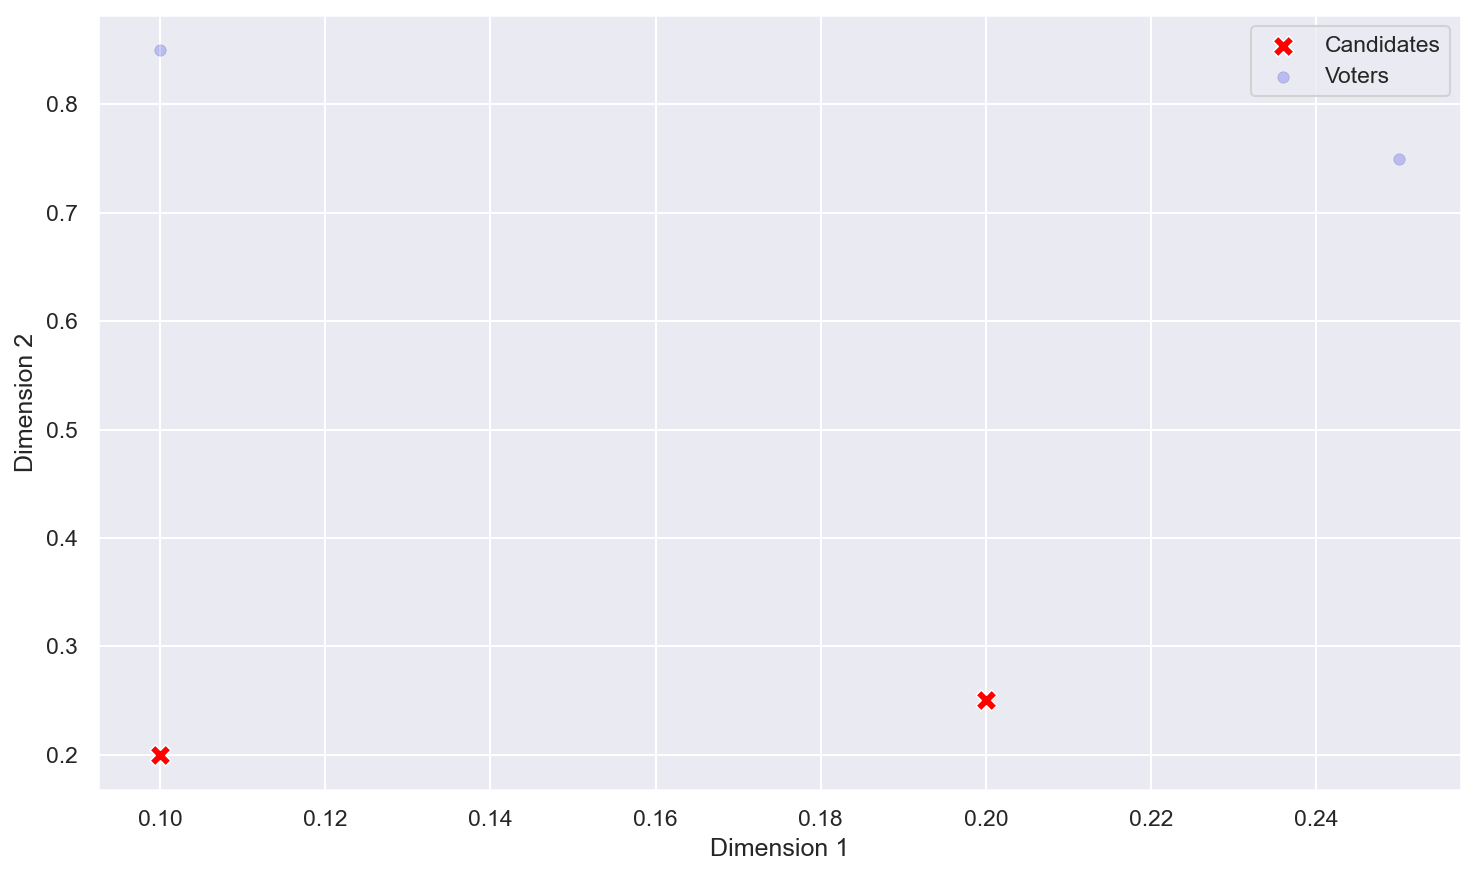

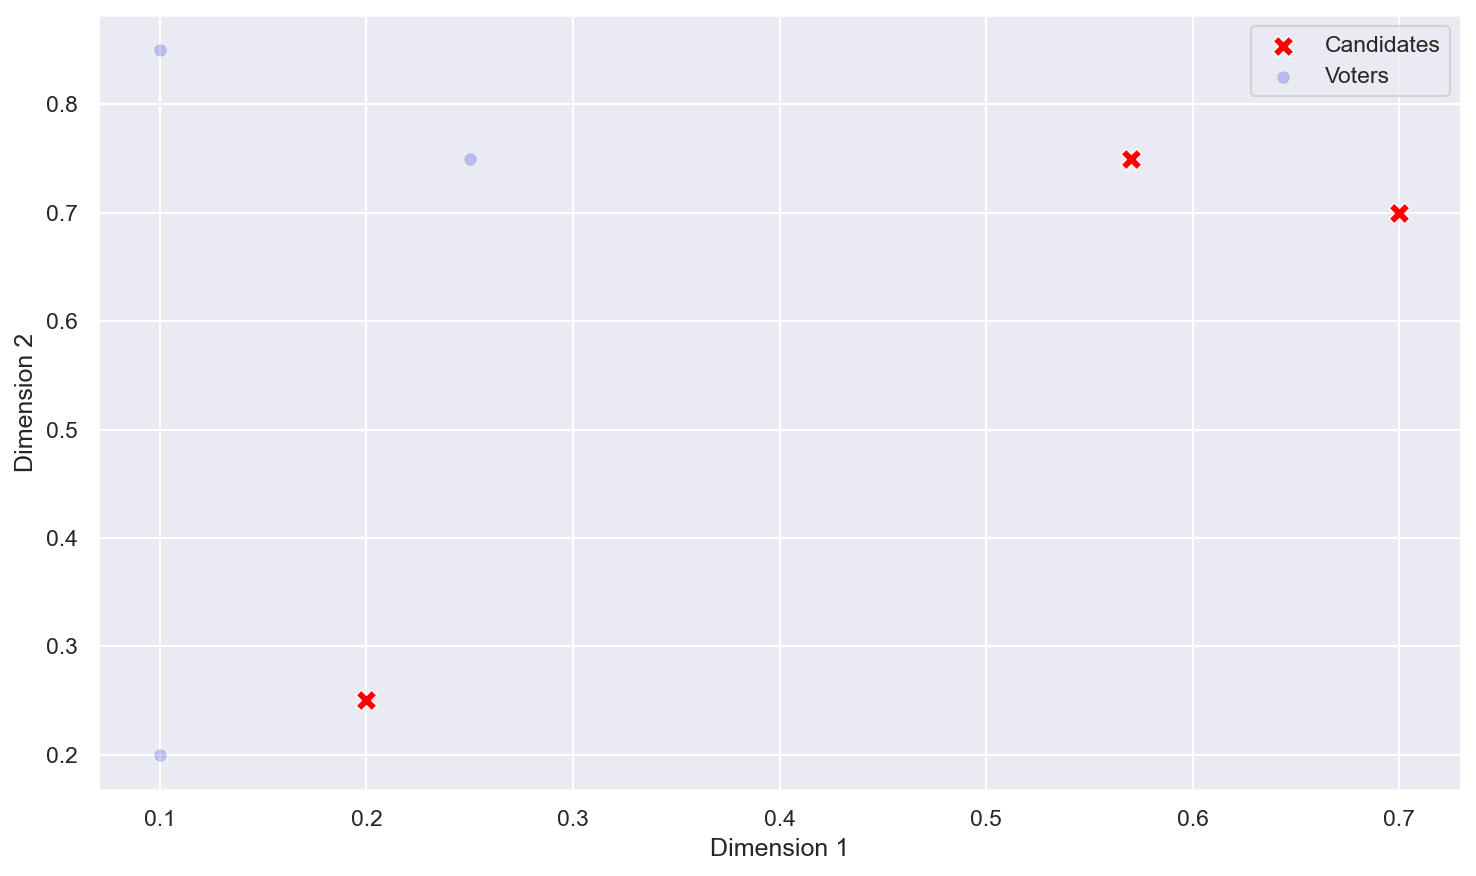

In [4]:
sp2 = SpatialProfile(
    {0:[0.1, 0.2], 1:[0.2, 0.25]}, 
    {0:[0.1, 0.2], 1:[0.25, 0.75], 2:[0.1, 0.85]})
sp2.view() 

#sp2.candidate_distances()

sp2.add_candidate([0.7, 0.7])

sp2.move_candidate(0, [0.57, 0.75])

sp2.view() 


+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| 3 | 1 | 2 | 0 | 0 | 3 |
| 2 | 3 | 0 | 1 | 3 | 1 |
| 0 | 2 | 1 | 3 | 1 | 2 |
| 1 | 0 | 3 | 2 | 2 | 0 |
+---+---+---+---+---+---+


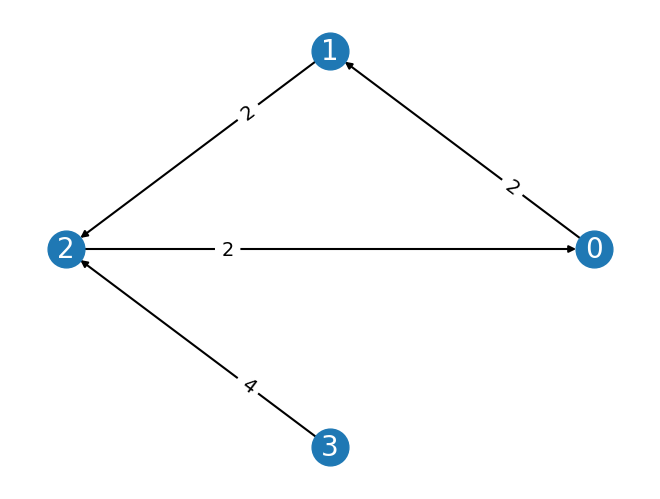

Simple Stable Voting winners are {0, 1, 3}
Stable Voting winners are {0, 1, 3}
Split Cycle winners are {0, 1, 3}
Stable Voting with explanation:  ([0, 1, 3], {0: [3, 2, 1], 1: [3, 0, 2], 3: [0, 2, 1]})


In [9]:
prof = Profile([[3, 2, 0, 1], [1, 3, 2, 0], [2, 0, 1, 3], [0, 1, 3, 2], [0, 3, 1, 2], [3, 1, 2, 0]], rcounts=[1, 1, 1, 1, 1, 1], cmap={0: '0', 1: '1', 2: '2', 3: '3'})

prof.display()

prof.display_margin_graph()
simple_stable_voting.display(prof)
stable_voting.display(prof)
split_cycle.display(prof)
print("Stable Voting with explanation: ", stable_voting_with_explanation(prof))


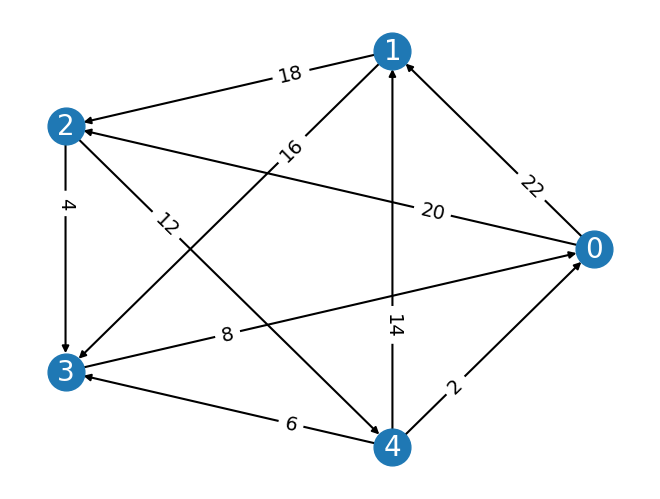

Simple Stable Voting winner is {4}
Stable Voting winner is {4}
([4], {4: [0, 3, 2, 1]})



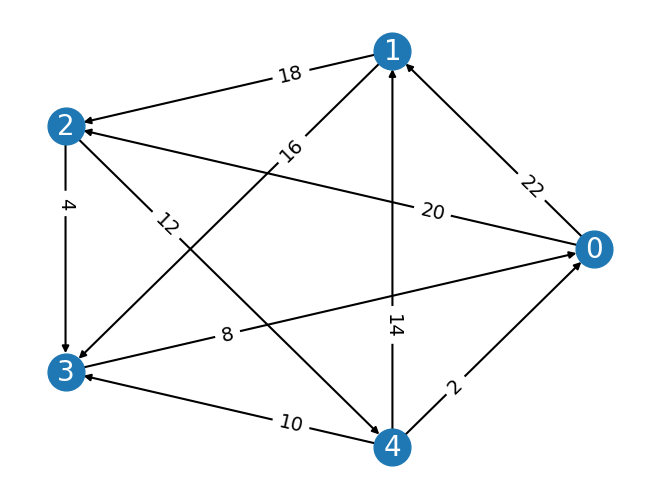

Simple Stable Voting winner is {0}
Stable Voting winner is {0}
([0], {0: [1, 3, 4, 2]})


In [5]:
mg = MarginGraph(
    [0, 1, 2, 3, 4],
    [
        (0, 1, 22),
        (0, 2, 20), 
        (1, 2, 18),
        (1, 3, 16), 
        (2, 3, 4), 
        (2, 4, 12), 
        (3, 0, 8), 
        (4, 3, 6), 
        (4, 1, 14), 
        (4, 0, 2)

    ]
)
mg.display()
simple_stable_voting.display(mg)
stable_voting.display(mg)
print(stable_voting_with_explanation(mg))

print()


mg = MarginGraph(
    [0, 1, 2, 3, 4],
    [
        (0, 1, 22),
        (0, 2, 20), 
        (1, 2, 18),
        (1, 3, 16), 
        (2, 3, 4), 
        (2, 4, 12), 
        (3, 0, 8), 
        (4, 3, 10), 
        (4, 1, 14), 
        (4, 0, 2)

    ]
)
mg.display()
simple_stable_voting.display(mg)
stable_voting.display(mg)
print(stable_voting_with_explanation(mg))
